<img src= 'https://innovatics.ai/innovatics.jpeg' width=300/>

## Project Guide  
------------  
- [Project Overview](#project-overview)  
- [Part 1: Reading Data - Exploratory Data Analysis with Pandas](#I)
- [Part 2: Visual data analysis in Python](#II)
- [Part 3: Data Pre-processing &  Preparation](#III)
- [Part 4: Predictive Analytics](#IV)
- [Part 5: Optimization (Hyper Parameter Tuning)](#V)

<details>
<summary>
Roadmap for Building Machine Learning Models
</summary>
<p>


    1. Prepare Problem  
    a) Define The Business Objective  
    b) Select the datasets  
    c) Load dataset  
    d) Load libraries  


**Data Pre-processing**  
This is the first step in building a machine learning model. Data pre-processing refers to the transformation of data
before feeding it into the model. It deals with the techniques that are used to convert unusable raw data into clean 
reliable data.  
  
Since data collection is often not performed in a controlled manner, raw data often contains outliers 
(for example, age = 120), nonsensical data combinations (for example, model: bicycle, type: 4-wheeler), missing values, 
scale problems, and so on. Because of this, raw data cannot be fed into a machine learning model because it might 
compromise the quality of the results. As such, this is the most important step in the process of data science.  
  

    2. Summarize Data  
    a) Descriptive statistics  
    b) Data visualizations  

    3. Prepare Data  
    a) Data Cleaning  
    b) Feature Selection  
    c) Data Transformation  

**Model Learning**  
After pre-processing the data and splitting it into train/test sets (more on this later), we move on to modeling. Models 
are nothing but sets of well-defined methods called algorithms that use pre-processed data to learn patterns, which can 
later be used to make predictions. There are different types of learning algorithms, including supervised, semi-supervised, 
unsupervised, and reinforcement learning. These will be discussed later.
  
    4. Modeling Strategy  
    a) Select Suitable Algorithms  
    b) Select Training/Testing Approaches  
    c) Train   
  
  
**Model Evaluation**  
In this stage, the models are evaluated with the help of specific performance metrics. With these metrics, we can go on to 
tune the hyperparameters of a model in order to improve it. This process is called hyperparameter optimization. We will 
repeat this step until we are satisfied with the performance.  
  
    4. Evaluate Algorithms  
    a) Split-out validation dataset  
    b) Test options and evaluation metric  
    c) Spot Check Algorithms  
    d) Compare Algorithms  
  
**Prediction**  
Once we are happy with the results from the evaluation step, we will then move on to predictions. Predictions are made 
by the trained model when it is exposed to a new dataset. In a business setting, these predictions can be shared with 
decision makers to make effective business choices.  
  
    5. Improve Accuracy  
    a) Algorithm Tuning  
    b) Ensembles  

**Model Deployment**  
The whole process of machine learning does not just stop with model building and prediction. It also involves making use 
of the model to build an application with the new data. Depending on the business requirements, the deployment may be a 
report, or it may be some repetitive data science steps that are to be executed. After deployment, a model needs proper 
management and maintenance at regular intervals to keep it up and running.  

    6. Finalize Model  
    a) Predictions on validation dataset  
    b) Create standalone model on entire training dataset  
    c) Save model for later use  


</p>
</details>

<a id="I"></a>

# I.  Reading Data - Exploratory Data Analysis with Pandas

### Article outline
1. Demonstration of main Pandas methods
2. First attempt on predicting Auto Insurance Fraud
3. Useful resources

### 1. Demonstration of main Pandas methods 

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [34]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities


# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


We’ll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


In [4]:
# Disply all Columns
pd.options.display.max_columns=40

In [21]:
autinsurance = pd.read_csv('insurance_claims.csv')
autinsurance

,months_as_customer,Age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,Number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2/22/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,1/24/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,1/23/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2/26/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


In [13]:
# Print () function
# Name of the object

In [14]:
#autinsurance.info()

In [15]:
#autinsurance.isna().sum()  ## Count Filled cells
                             ## Sum empty cells

<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` looks worse.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

### Rudimentary Cleaning

The cell below will load our dataset in, and perform some rudimentary cleaning.  

Do not worry if you do not understand all of the code below. Comments are provided if you are interested in following along.

In [22]:
# Column names may be accessed (and changed) using the `.columns` attribute as below
print("Old Column Names:\n", autinsurance.columns) 

Old Column Names:
 Index(['months_as_customer', 'Age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'Number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [23]:
#!pip install pyjanitor 

In [24]:
#!pip install pyjanitor 
import janitor
autinsurance = autinsurance.clean_names()
print("New Janitor Column Names:\n", autinsurance.columns) 

New Janitor Column Names:
 Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [25]:
# # Stripping out spaces from ends of names, and replacing internal spaces with "_"
# print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
# autinsurance.columns = [col.strip().replace(' ', '_').lower() for col in autinsurance.columns]
# autinsurance.columns = [col.strip().replace('-', '_').lower() for col in autinsurance.columns]
# # Print edited column names
# print("\nNew Column Names:\n", autinsurance.columns)

### A Few Useful Functions

With data in hand, it is time to look at a few functions which will be critical to your succes in understanding and completeing this assignment. All of the functions come from the "`numpy`" package. "`Numpy`" will be more completely introduced in week 8.  

The functions are:  

- `np.mean` - For calculating a mean
- `np.std` - For calculating standard deviation
- `np.var` - For calculating variance
- `np.ptp` - For calculating range (ptp stands for "point to point")
- `np.sqrt` - For taking the square root of a number (instead of x \*\* .5)
- `np.min` - For finding the minimum value of a collection
- `np.max` - For finding the maximum value of a collection 


Of note, these functions work with most any type of collection: list, tuple, array, etc; through not with dictionaries.  

In the below examples, the "sales" and "transactions" data are accessed via "`office['sales']`" and "`office['transactions']`" respectively. Accessing the data this way yeilds a "`Pandas Series`"; a data type that will be covered more completely in week 9. For the purposes here, the `Series` may be thought of as a special type of list.

Let’s have a look at data dimensionality, features names, and feature types.

In [ ]:
#dir(autinsurance)

In [10]:
autinsurance.shape

(1000, 39)

In [ ]:
# print(autinsurance.columns)

We can use the `info()` method to output some general information about the dataframe: 

In [26]:
autinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

We can **change the column type** with the `astype` method. Let’s apply this method to the `Churn` feature to convert it into `int64`:


In [ ]:
# autinsurance['fraud_reported'] = autinsurance['fraud_reported'].astype('int64') # Assuming your TV is of string type (Yes/No)

In [ ]:
# Number of rows
len(autinsurance)  # for traceability 576 rows imported


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [27]:
autinsurance.describe() # Similar to summary() in R

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


In [ ]:
autinsurance.describe().T # Similar to summary() in R

In [ ]:
autinsurance.describe().transpose()  # change the rows and columns

In [ ]:
# group by the 'label' and show descriptive stats
autinsurance.groupby('age').agg(['count', 'mean','std','min','max','median']).T.head(20)

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [31]:
autinsurance.describe(include=['object', 'boolean'])

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39
top,1/1/2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at the distribution of `Churn`:

In [28]:
autinsurance['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

753 users out of 247 are *loyal*; their `Fraud` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [29]:
autinsurance['fraud_reported'].value_counts(normalize=True)

0    0.753
1    0.247
Name: fraud_reported, dtype: float64

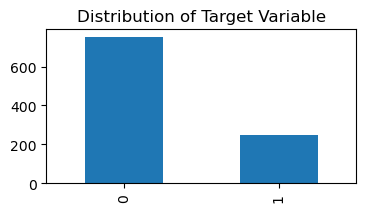

In [30]:
(autinsurance['fraud_reported'].value_counts().plot(
        kind='bar',
        figsize=(4, 2),
        title='Distribution of Target Variable',
    )
);
plt.show()

The target variable, `bad_loan`, is **unbalanced** - meaning the variable contains about 4x more "good" loan instances than "bad" loan instances. This can present a problem since the **positive class** we want to predict is the "bad" loan class (`1.0`).

Because of this unbalanced data, we will make sure that both our training set and testing set **maintain this ratio** of good:bad loans. This is acheived by using the `stratify` argument in the `train_test_split()` function, which was imported from the `sklearn.model_selection` module.


### 2.  Indexing and retrieving data

DataFrame can be indexed in different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**



In [ ]:
autinsurance['fraud_reported'].mean()


14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let’s use it to answer the question:

**What are average values of numerical features for churned users?**


In [ ]:
autinsurance[autinsurance['fraud_reported'] == 1].mean()


DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case, we would say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*, and, in the second case, we would say *"give us the values of the first five rows in the first three columns"* (as in typical Python slice: the maximal value is not included).


In [ ]:
autinsurance.columns

In [ ]:
autinsurance.loc[0:5, 'age':'witnesses']

In [ ]:
autinsurance.iloc[0:5, 0:3]

If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [ ]:
autinsurance[-1:]


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [ ]:
autinsurance.apply(np.max) 

<a id="II"></a>
# II. Visual data analysis in Python


In the field of Machine Learning, *data visualization* is not just making fancy graphics for reports; it is used extensively in day-to-day work for all phases of a project.

To start with, visual exploration of data is the first thing one tends to do when dealing with a new task. We do preliminary checks and analysis using graphics and tables to summarize the data and leave out the less important details. It is much more convenient for us, humans, to grasp the main points this way than by reading many lines of raw data. It is amazing how much insight can be gained from seemingly simple charts created with available visualization tools.

Next, when we analyze the performance of a model or report results, we also often use charts and images. Sometimes, for interpreting a complex model, we need to project high-dimensional spaces onto more visually intelligible 2D or 3D figures.

All in all, visualization is a relatively fast way to learn something new about your data. Thus, it is vital to learn its most useful techniques and make them part of your everyday ML toolbox.

We are going to get hands-on experience with visual exploration of data using popular libraries such as `matplotlib` and `seaborn`.

### Article outline

1. Dataset
2. Univariate visualization
    * 2.1 Quantitative features
    * 2.2 Categorical and binary features
3. Multivariate visualization
    * 3.1 Quantitative–Quantitative
    * 3.2 Quantitative–Categorical
    * 3.3 Categorical–Categorical
4. Whole dataset
    * 4.1 Naive approach
    * 4.2 Dimensionality reduction
    * 4.2 t-SNE
5. Useful resources

### 1. Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### 1.1 Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### 1.1.1 Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

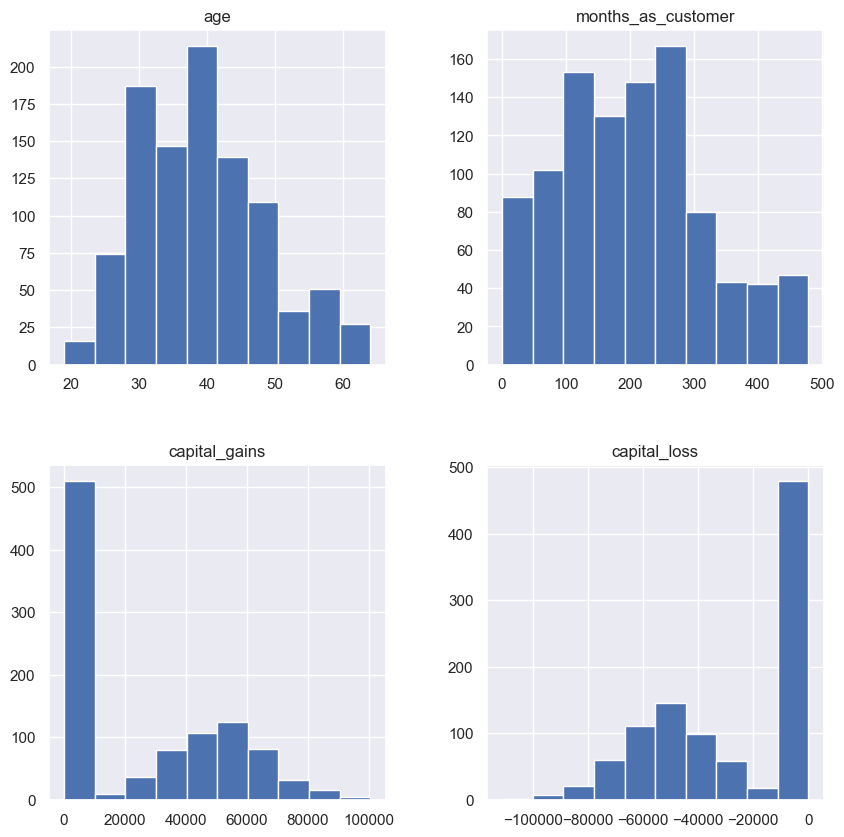

In [35]:
features = ['age', 'months_as_customer', 'capital_gains', 'capital_loss']

autinsurance[features].hist(figsize=(10, 10));

In [ ]:
autinsurance[features].hist(figsize=(10, 10))

A histogram groups values into *bins* of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type of it, most often Gaussian.

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: *density plots* or, more formally, *Kernel Density Plots*. They can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

In [ ]:
autinsurance[features].plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(10, 10));

It is also possible to plot a distribution of observations with `seaborn`'s [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). For example, let's look at the distribution of *Total day minutes*. By default, the plot displays both the histogram with the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) on top.

In [ ]:
# increasing the width of the Chart
import seaborn as sns
plt.rcParams['figure.figsize'] = 5,5 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
sns.distplot(autinsurance["age"]) # pass it one variable

# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
# increasing the width of the Chart
plt.rcParams['figure.figsize'] = 4,4 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
sns.distplot(autinsurance["months_as_customer"]) # pass it one variable

# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

#### 1.2 Categorical and binary features

*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example. *Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called *ordinal*.

##### 1.2.1 Frequency table

Let’s check the class balance in our dataset by looking at the distribution of the target variable: the *churn rate*. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method:

In [ ]:
autinsurance['fraud_reported'].value_counts()

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not *balanced*; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionaly penalize our model errors in predicting the minority "Churn" class.

##### 1.2.2 Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

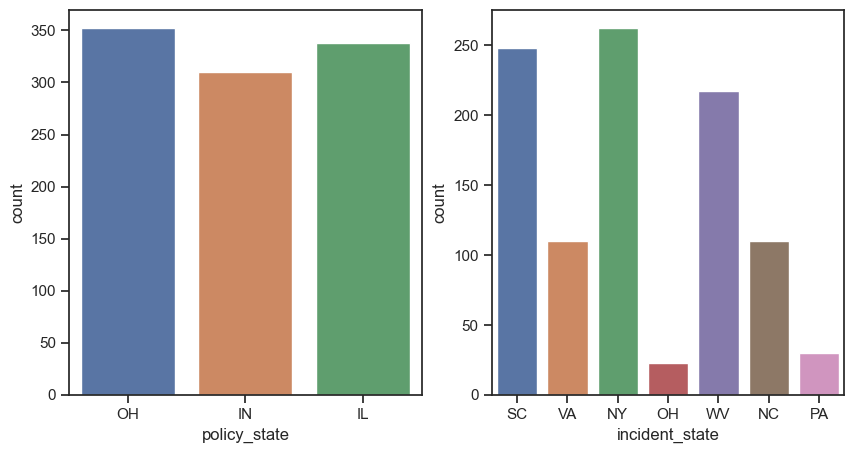

In [38]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(x='policy_state', data=autinsurance, ax=axes[0]);
sns.countplot(x='incident_state', data=autinsurance, ax=axes[1]);

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

sns.countplot(x='insured_education_level', data=autinsurance, ax=axes[0]);
sns.countplot(x='insured_relationship', data=autinsurance, ax=axes[1]);

#### 1.2.3. Distributions of categorical features

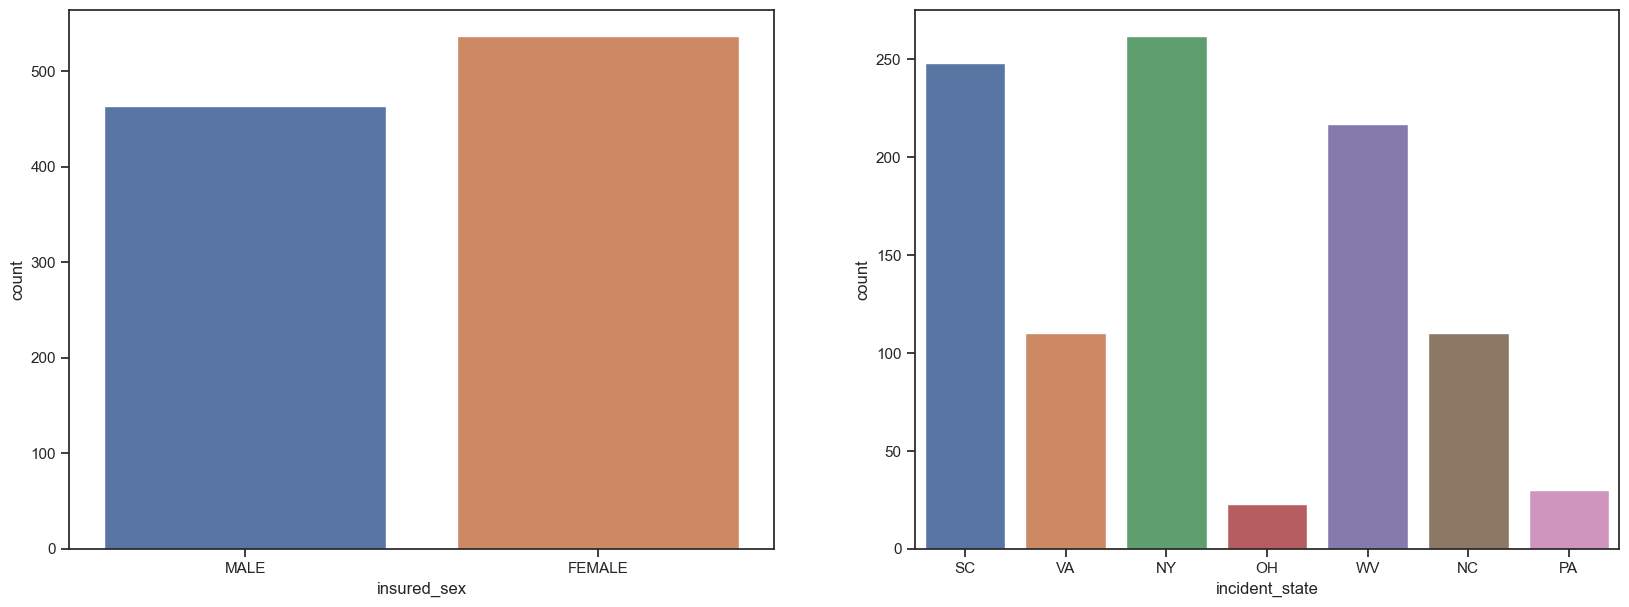

In [39]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

sns.countplot(x='insured_sex', data=autinsurance, ax=axes[0]);
sns.countplot(x='incident_state', data=autinsurance, ax=axes[1]);

In [ ]:
# Distributions of categorical features
plt.rcParams['figure.figsize'] = 8,6
sns.countplot(y='insured_sex', data=autinsurance)
plt.show()

sns.countplot(y='incident_state', data=autinsurance)
plt.show()

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
1. *Histograms* are best suited for looking at the distribution of numerical variables while *bar plots* are used for categorical features.
2. The values on the X-axis in the *histogram* are numerical; a *bar plot* can have any type of values on the X-axis: numbers, strings, booleans.
3. The *histogram*'s X-axis is a *Cartesian coordinate axis* along which values cannot be changed; the ordering of the *bars* is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider *ordinal* variables (like *Customer service calls* in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

### 2. Multivariate visualization

*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 2.1 Quantitative–Quantitative

##### 2.1.1 Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:

In [ ]:
autinsurance.head(5)

In [40]:
corr_matrix = autinsurance.corr(method = 'spearman')  # corr(autinsurance)
corr_matrix

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.912725,0.058348,0.016145,0.020084,0.004919,0.012951,-0.005428,0.013624,0.075522,0.015879,-0.016556,0.056636,0.052744,0.063605,0.025255,0.048206,0.004376,0.015133
age,0.912725,1.000000,0.060699,0.022527,0.030759,0.001981,0.008522,-0.020973,0.001411,0.095261,0.020714,-0.019354,0.047442,0.065135,0.074304,0.055536,0.051485,0.005606,0.003637
policy_number,0.058348,0.060699,1.000000,-0.015694,0.018145,0.005017,-0.000638,0.007200,-0.007650,-0.000663,0.016558,-0.005012,-0.013483,-0.008040,-0.011381,-0.002653,-0.013436,-0.000718,-0.030222
policy_deductable,0.016145,0.022527,-0.015694,1.000000,0.003461,0.001609,-0.004514,0.028327,-0.024865,0.066797,0.044657,-0.019673,0.075558,0.019857,0.029569,0.056558,0.003857,0.024148,0.007041
policy_annual_premium,0.020084,0.030759,0.018145,0.003461,1.000000,-0.001056,0.043171,-0.015294,0.032233,-0.002511,-0.044377,0.020619,0.012142,-0.001634,-0.019166,-0.004412,0.007299,-0.029840,-0.015358
umbrella_limit,0.004919,0.001981,0.005017,0.001609,-0.001056,1.000000,0.004205,-0.042554,-0.020611,-0.021295,-0.025267,0.041596,-0.008295,-0.041176,-0.047237,-0.017578,-0.038006,0.012026,0.060056
insured_zip,0.012951,0.008522,-0.000638,-0.004514,0.043171,0.004205,1.000000,0.015023,0.041810,0.009845,0.013981,0.040177,0.022208,-0.002895,-0.008189,-0.014668,-0.016474,-0.027543,0.061857
capital_gains,-0.005428,-0.020973,0.007200,0.028327,-0.015294,-0.042554,0.015023,1.000000,-0.041112,-0.016139,0.057753,0.055789,-0.016751,0.012380,0.022957,0.005267,0.010284,0.027424,-0.020754
capital_loss,0.013624,0.001411,-0.007650,-0.024865,0.032233,-0.020611,0.041810,-0.041112,1.000000,-0.029257,-0.017218,-0.024015,-0.039988,-0.042204,-0.045653,-0.023383,-0.040457,-0.054552,-0.015365
incident_hour_of_the_day,0.075522,0.095261,-0.000663,0.066797,-0.002511,-0.021295,0.009845,-0.016139,-0.029257,1.000000,0.125927,-0.034651,0.006390,0.178218,0.165724,0.169450,0.174234,0.020370,0.004153


<h4>Highly correlated items = not good!</h4>
<h4>Low correlated items = good </h4>
<h4>Correlations with target (dv) = good (high predictive power)</h4>

In [ ]:
autinsurance = autinsurance.drop("morocco", axis = 1)

<AxesSubplot:>

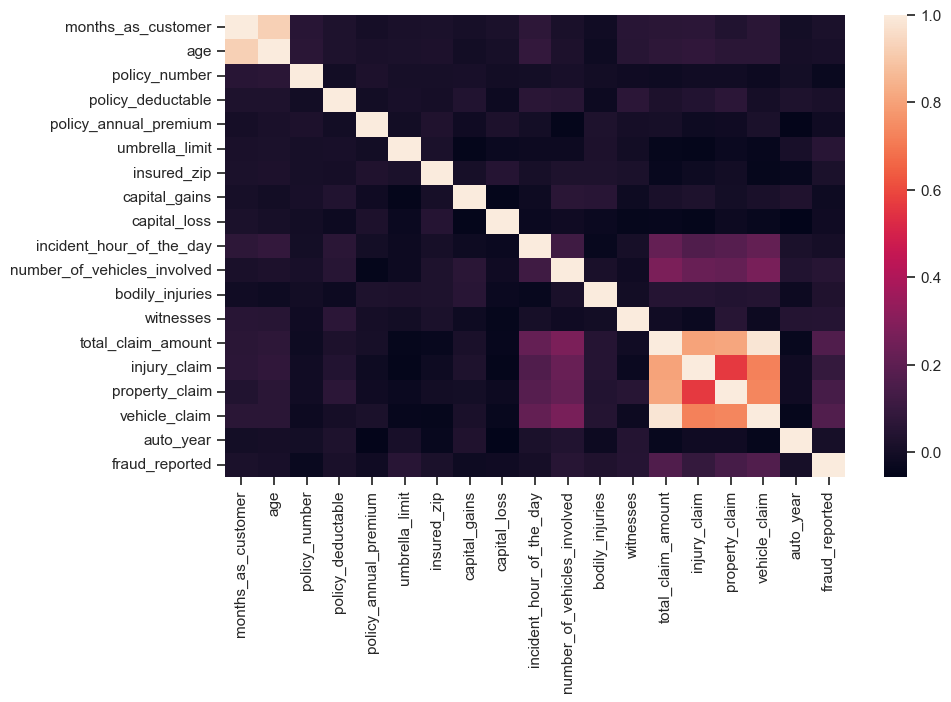

In [41]:
#### 4.2 Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 10,6  # control plot sizeimport seaborn as sns
sns.heatmap(autinsurance.corr())

In [ ]:
# seaborn
## first_twenty = har_train.iloc[:, :20] # pull out first 20 feats
corr = autinsurance.corr()  # compute correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)  # make mask
mask[np.triu_indices_from(mask)] = True  # mask the upper triangle

fig, ax = plt.subplots(figsize=(11, 9))  # create a figure and a subplot
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidth=0.5,
    cbar_kws={'shrink': 0.5}
);

In [ ]:
autinsurance

##### How to calculate correlation between all columns and remove highly correlated ones using pandas?

In [ ]:
# import numpy as np

# # Create correlation matrix
# corr_matrix = autinsurance.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# # Drop features 
# autinsurance.drop(to_drop, axis=1, inplace=True)

# autinsurance.shape

In [ ]:
# # Drop non-numerical variables
# # numerical = list(set(autinsurance.columns) - 
# #                  set(['rowNumber', 'customerId', 'gender', 'surname','geography']))

# data = autinsurance.copy()

# columns = np.full((corr.shape[0],), True, dtype=bool)
# for i in range(corr.shape[0]):
#     for j in range(i+1, corr.shape[0]):
#         if corr.iloc[i,j] >= 0.9:
#             if columns[j]:
#                 columns[j] = False
# selected_columns = data.columns[columns]
# data = data[selected_columns]

In [ ]:
# # Correlation with Target Variable

# autinsurance.corr()['age'].plot()
# #autinsurance.corr()[:].plot()
# #autinsurance.corr().plot()

<h3>Pandas scatter matrix function helps visualize the relationship between features</h3>
Use with care though, because it is processor intensive

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(autinsurance, alpha=0.2, figsize=(30, 20), diagonal='kde')

In [ ]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
autinsurance.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()


In [ ]:
# Univariate Density Plots
plt.rcParams['figure.figsize'] = 20,20  # control plot size

autinsurance.plot(kind='density', subplots=True, layout=(6,6), sharex=False)
plt.show()


In [ ]:
# Univariate Histograms
plt.rcParams['figure.figsize'] = 20,20  # control plot size

autinsurance.hist()
plt.show()


##### 2.1.2 Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space. Scatter plots in 3D are also possible.

Let's try out the function [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) from the `matplotlib` library:

In [ ]:
plt.rcParams['figure.figsize'] = 5,5

plt.scatter(autinsurance['months_as_customer'], autinsurance['age']);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellpise-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:

In [ ]:
sns.jointplot(x='age', y='total_claim_amount', 
              data=autinsurance, kind='scatter');

The function [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution:

In [ ]:
sns.jointplot('age', 'total_claim_amount', data=autinsurance,
              kind="kde", color="g");

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### 2.1.3 Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

In [ ]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(autinsurance);

Because of this unbalanced data, we will make sure that both our training set and testing set **maintain this ratio** of good:bad loans. This is acheived by using the `stratify` argument in the `train_test_split()` function, which was imported from the `sklearn.model_selection` module.

##### 2.1.4 Linearily Separable


In [ ]:
# dt = pd.DataFrame(dict(x=X[:,0], y=X[:,1], lable = y))
# colors  ={ 0: 'red', 1: 'blue'}
# fig, ax = plt.subplots()
# grouped = dt.groupby('lable')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x ='x',y= 'y', label = key, color = colors[key])
# plt.show()

<a id="III"></a>
# III. Visual Data Analysis in with Profile Report


In [ ]:
#!pip install pandas-profiling

In [ ]:
import pandas_profiling

autinsurance.profile_report()

In [ ]:
#profile = ProfileReport(autinsurance, title='Pandas Profiling Report')

In [ ]:
#profile

<a id="IV"></a>
# IV. Visual Data Analysis in with SweetViz


In [ ]:
# SweetViz 2.0 Demonstration 
# Author : Kopal Rastogi
# Created : Jan-05-2021
# Keywords : EDA, Data Visualization,Pandas
# Assumptions : None

In [ ]:
# Import Libraries
print('Importing Libraries ... ',end='')
import sweetviz as sv
import pandas as pd
print('Done')

In [ ]:
# Analyzing data
report=sv.analyze(autinsurance)

# Generating report
report.show_html('eda_report.html')

#### Playing with Reports

In [ ]:
report.show_html(filepath='eda_report.html',
open_browser=True,
layout='vertical',
scale=0.7)

In [ ]:
report.show_notebook(w=None, 
                h=None, 
                scale=None,
                layout='vertical',
                filepath='sweetviz_report.html')

In [ ]:
autinsurance.columns

In [ ]:
to_delete= ['age', 'policy_number', 'policy_bind_date', 'insured_zip', 'incident_date', 'incident_city',
            'incident_location', 'incident_hour_of_the_day', 'total_claim_amount','injury_claim', 
            'property_claim', 'auto_year' ]

In [ ]:
autinsuranceV2 = autinsurance.drop(to_delete, axis = 1)

In [ ]:
print(autinsurance.shape)
print(autinsuranceV2.shape)

In [ ]:
# Save to file
autinsuranceV2.to_csv("insurance_claimsV2.csv", index = False)
